# Filip Kucia

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

# Exercices 1-8



1. The statistical mechanics of networks
Juyong Park, M. E. J. Newman


# Entropy in Network Probability Computation

Entropy is implicitly used when we compute \( P(G) \) in the form:
$$
P(G) = \frac{e^{-H(G)}}{Z}
$$

This is derived from maximizing entropy under constraints.


In [6]:
import numpy as np
from scipy.optimize import minimize

# Define the space of graphs with N=2 vertices
# There are 2^(N(N-1)/2) = 2 possible graphs (no edges, one edge)
N = 5
num_graphs = 2 ** (N * (N - 1) // 2)

# Initial probability distribution (uniform)
initial_probs = np.full(num_graphs, 1 / num_graphs)

# Entropy function
def entropy(P):
    return -np.sum(P * np.log(P + 1e-10))  # Add small term to avoid log(0)

# Constraint: Sum of probabilities should be 1
constraints = {
    'type': 'eq',
    'fun': lambda P: np.sum(P) - 1
}

# Bounds for each P(G) to be in [0, 1]
bounds = [(0, 1) for _ in range(num_graphs)]

# Maximize entropy (minimize negative entropy)
result = minimize(lambda P: -entropy(P), initial_probs, constraints=[constraints], bounds=bounds)

# Display the result
if result.success:
    optimal_probs = result.x
    print("Optimal Probability Distribution P(G):")
    print(optimal_probs)
else:
    print("Optimization did not succeed.")


Optimal Probability Distribution P(G):
[0.00097656 0.00097656 0.00097656 ... 0.00097656 0.00097656 0.00097656]


Partition function Z: 6.55068828043731

Probability distribution for graphs:
Graph edges: () Probability: 0.1526557145126805
Graph edges: ((2, 3),) Probability: 0.05615889894655215
Graph edges: ((1, 3),) Probability: 0.05615889894655215
Graph edges: ((1, 3), (2, 3)) Probability: 0.020659704361261105
Graph edges: ((1, 2),) Probability: 0.05615889894655215
Graph edges: ((1, 2), (2, 3)) Probability: 0.020659704361261105
Graph edges: ((1, 2), (1, 3)) Probability: 0.020659704361261105
Graph edges: ((1, 2), (1, 3), (2, 3)) Probability: 0.0076002804951879445
Graph edges: ((0, 3),) Probability: 0.05615889894655215
Graph edges: ((0, 3), (2, 3)) Probability: 0.020659704361261105
Graph edges: ((0, 3), (1, 3)) Probability: 0.020659704361261105
Graph edges: ((0, 3), (1, 3), (2, 3)) Probability: 0.0076002804951879445
Graph edges: ((0, 3), (1, 2)) Probability: 0.020659704361261105
Graph edges: ((0, 3), (1, 2), (2, 3)) Probability: 0.0076002804951879445
Graph edges: ((0, 3), (1, 2), (1, 3)) Probabilit

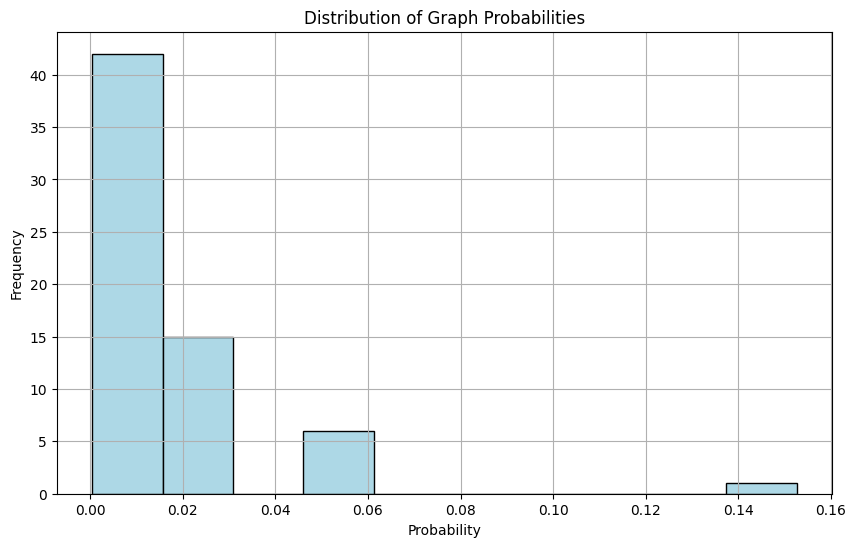

In [ ]:
import itertools
import networkx as nx
import numpy as np

def hamiltonian(graph):
    """Define the Hamiltonian based on the number of edges."""
    num_edges = graph.number_of_edges()
    return num_edges 

def generate_graphs(num_vertices):
    """Generate all possible graphs with a given number of vertices."""
    all_graphs = []
    nodes = range(num_vertices)
    for edges in itertools.product([0, 1], repeat=num_vertices * (num_vertices - 1) // 2):
        G = nx.Graph()
        G.add_nodes_from(nodes)
        edge_list = []
        idx = 0
        for i in range(num_vertices):
            for j in range(i + 1, num_vertices):
                if edges[idx] == 1:
                    edge_list.append((i, j))
                idx += 1
        G.add_edges_from(edge_list)
        all_graphs.append(G)
    return all_graphs

def compute_partition_function(graphs, beta):
    """Compute the partition function Z."""
    Z = sum(np.exp(-beta * hamiltonian(G)) for G in graphs)
    return Z

def probability_distribution(graphs, beta, Z):
    """Compute the probability distribution P(G)."""
    distribution = {tuple(G.edges): np.exp(-beta * hamiltonian(G)) / Z for G in graphs}
    return distribution

# Parameters
num_vertices = 4  # Number of vertices in the graph
beta = 1.0  # Inverse temperature parameter (controls constraint strength)

# Generate all possible graphs
graphs = generate_graphs(num_vertices)

# Compute the partition function
Z = compute_partition_function(graphs, beta)

# Compute the probability distribution
distribution = probability_distribution(graphs, beta, Z)

# Display results
print("Partition function Z:", Z)
print("\nProbability distribution for graphs:")
for graph_edges, prob in distribution.items():
    print("Graph edges:", graph_edges, "Probability:", prob)

# Visualize the probabilities
import matplotlib.pyplot as plt

prob_values = list(distribution.values())
plt.figure(figsize=(10, 6))
plt.hist(prob_values, bins=10, color='lightblue', edgecolor='black')
plt.title('Distribution of Graph Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### Ex.2


Implement a function that returns the adjacency matrix of one
realization of the ER graph with given values of N and p. Watch out
for the trap!

In [ ]:
def adj_matrix(p: float, N = 10):
    G = nx.generators.erdos_renyi_graph(N, p)
    A = np.zeros((N,N))

    for u in G.edges(data = True):
#         print(u[0], u[1])

        A[u[0], u[1]] = 1
        A[u[1], u[0]] = 1
    return A,G

In [14]:
A,G = adj_matrix(p = 0.4, N = 10)

In [15]:
A

array([[0., 0., 1., 1., 0., 1., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0., 1., 1., 0., 0., 0.],
       [1., 0., 1., 1., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 0., 1., 1., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 0., 1., 0., 0.]])

### Ex.3

Draw resulting graph

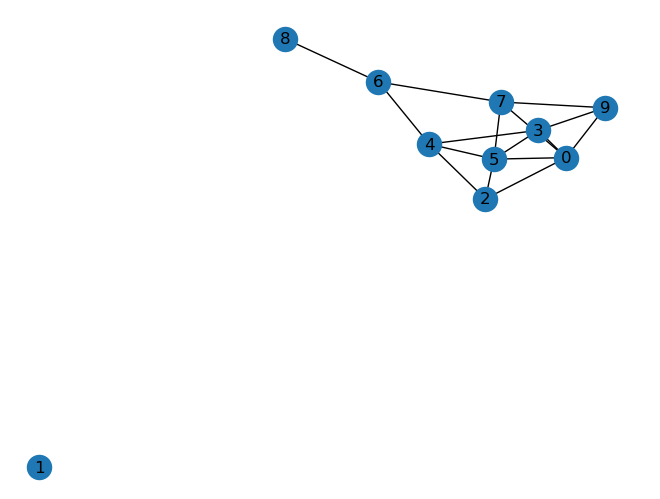

In [16]:
nx.draw(G, with_labels=True)

In [17]:
nx.adjacency_matrix(G).todense() # same result as A

array([[0, 0, 1, 1, 0, 1, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 1, 0, 0, 0, 1],
       [0, 0, 1, 1, 0, 1, 1, 0, 0, 0],
       [1, 0, 1, 1, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 1, 0],
       [1, 0, 0, 0, 0, 1, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 1, 0, 0]], dtype=int32)

### Ex.4

Draw histogram of degree distribution.

(array([1., 0., 1., 0., 0., 0., 3., 0., 3., 2.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

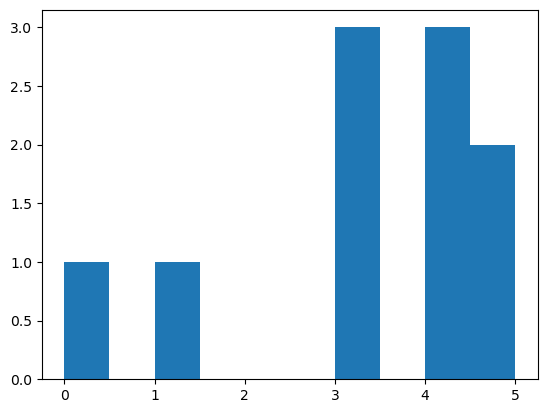

In [18]:
# A,G = adj_matrix(p = 0.4, N = 10)


X = list(dict(G.degree).values())
plt.hist(X)

(array([ 5.,  8., 20., 28., 33., 32., 35., 20.,  9., 10.]),
 array([45. , 48.1, 51.2, 54.3, 57.4, 60.5, 63.6, 66.7, 69.8, 72.9, 76. ]),
 <BarContainer object of 10 artists>)

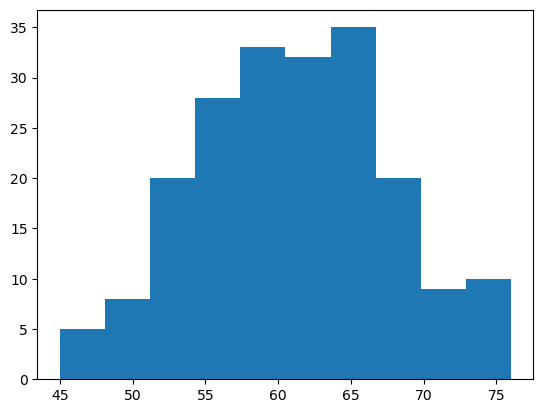

In [19]:
A,G = adj_matrix(p = 0.3, N = 200)


X = list(dict(G.degree).values())
plt.hist(X)

### Ex.5

What degree of vertex distribution do we expect?

Answer:  We expect **binomial** distribution, which for huge N and small p could be approximated by poissonian distribution. 



Then, ⟨ k⟩ ≈ Np  is a good poisson distribution parameter.

### Ex.6

Give the mathematical justification for the Poisson approximation
used.

It could be proven that while N tends to infinity, and lambda (or \<k>) = N*p, then the probability distribution tends to poisson probability distribution. 


Proof for example here: http://mathcenter.oxford.emory.edu/site/math117/connectingPoissonAndBinomial/ 

### Ex.7

Plot both the simulation results and analytically obtained
distributions on one graph. Test appropriate hypotheses.

(array([ 23., 114., 293., 312., 542., 390., 163., 110.,  45.,   8.]),
 array([ 8. , 10.7, 13.4, 16.1, 18.8, 21.5, 24.2, 26.9, 29.6, 32.3, 35. ]),
 <BarContainer object of 10 artists>)

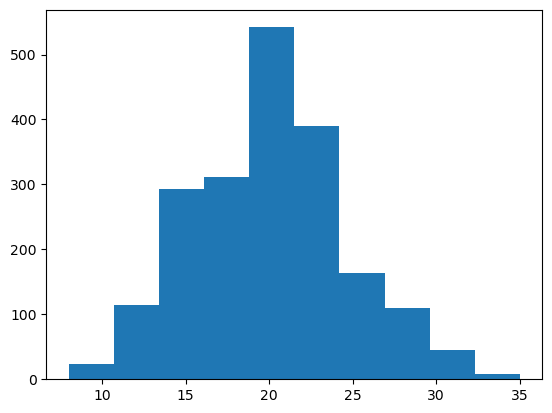

In [20]:
A,G = adj_matrix(p = 0.01, N = 2000)


X = list(dict(G.degree).values())
plt.hist(X)

C:\Users\Filip\AppData\Local\Temp\ipykernel_30344\529204218.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample, kde=False, label = 'poisson', bins = np.linspace(0,35, num = 36))
C:\Users\Filip\AppData\Local\Temp\ipykernel_30344\529204218.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distp

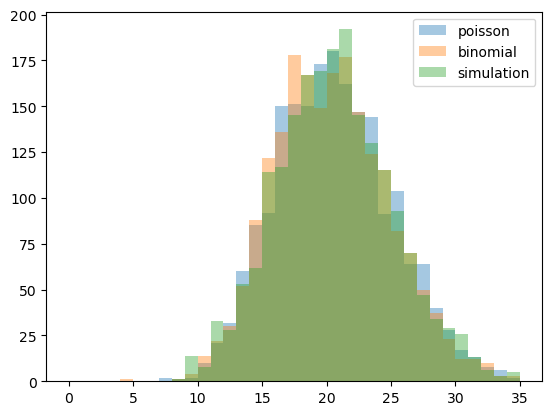

In [21]:
# Import poisson, matplotlib.pyplot, and seaborn
from scipy.stats import poisson
from scipy.stats import binom
import matplotlib.pyplot as plt 
import seaborn as sns

# Create the sample
sample = poisson.rvs(mu=20, size=2000, random_state=13)
sample2 = binom.rvs(p=0.01, n=2000, size = 2000, random_state=13)

# Plot the sample
sns.distplot(sample, kde=False, label = 'poisson', bins = np.linspace(0,35, num = 36))
sns.distplot(sample2, kde=False, label = 'binomial', bins = np.linspace(0,35, num = 36))
sns.distplot(X, kde=False, label = 'simulation', bins = np.linspace(0,35, num = 36))
plt.legend()
plt.show()

In [22]:
from scipy.stats import ks_2samp

In [23]:
# hypotheeses tests

In [24]:
ks_2samp(X, sample, alternative='two-sided', method='auto')

# null hypothesis should not be rejected, degree distribution sample and poisson distribution sample have similar distributions 

KstestResult(statistic=0.0155, pvalue=0.9699601425241099, statistic_location=17, statistic_sign=-1)

In [25]:
ks_2samp(X, sample2, alternative='two-sided', method='auto')

# null hypothesis should not be rejected, degree distribution sample and binomial distribution sample have similar distributions 

KstestResult(statistic=0.0365, pvalue=0.13923199690622226, statistic_location=17, statistic_sign=-1)

In [26]:
res = ks_2samp(X, sample2, alternative='two-sided', method='auto')

In [27]:
res[1]

0.13923199690622226

### Ex.8

Check dependence of the results of the previous excercise for
various values of p and N.

### Dependence on N

In [28]:


p_values_binomial = []
p_values_poisson = []

Ns = np.array(np.linspace(10,2000, 100), dtype = int)
# ps = np.linspace(0.01, 0.50, 50)


p_ = 0.05

for N in Ns:
    _,G = adj_matrix(p = p_, N = N)
    X = list(dict(G.degree).values())
    # Create the samples
    sample = poisson.rvs(mu=p_*N, size=N, random_state=13)
    sample2 = binom.rvs(p=p_, n=N, size = N, random_state=13)
    p_values_binomial.append(ks_2samp(X, sample2, alternative='two-sided', method='auto')[1])
    p_values_poisson.append(ks_2samp(X, sample, alternative='two-sided', method='auto')[1])



C:\Users\Filip\AppData\Local\Temp\ipykernel_30344\4217761701.py:17: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  p_values_poisson.append(ks_2samp(X, sample, alternative='two-sided', method='auto')[1])


c:\Users\Filip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Filip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Dependence of p-value on N, p = 0.05 (binomial distr)')]

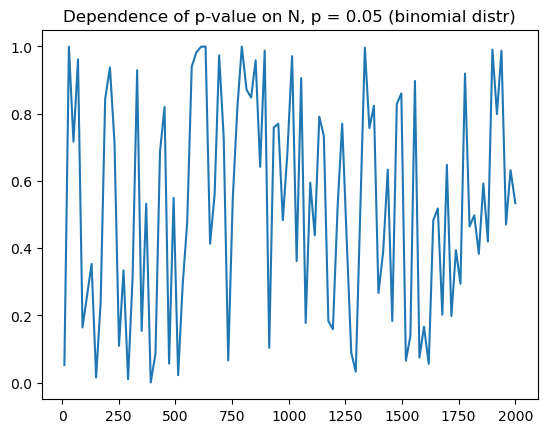

In [29]:
sns.lineplot(data=None,  x=Ns, y=p_values_binomial).set(title='Dependence of p-value on N, p = 0.05 (binomial distr)')

c:\Users\Filip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Filip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Dependence of p-value on N, p = 0.05 (poisson distr)')]

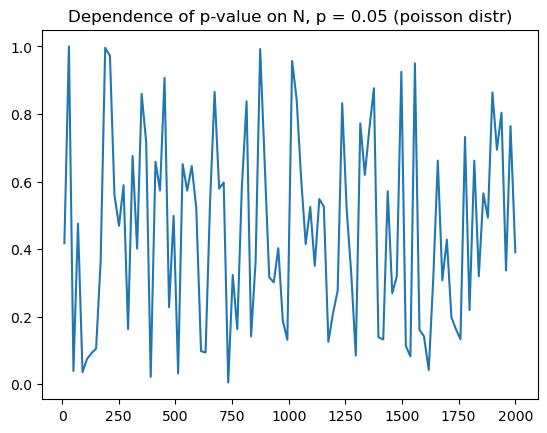

In [30]:
sns.lineplot(data=None,  x=Ns, y=p_values_poisson).set(title='Dependence of p-value on N, p = 0.05 (poisson distr)')

In both cases, p-value distribution seems to be uniform distribution on [0,1], that would imply that null hypotheses are true -- there is no significant difference between degree distribution and poisson or binomial sitributions.

### Dependence on p

In [31]:

p_values_binomial = []
p_values_poisson = []

# Ns = np.array(np.linspace(50,2000, 40), dtype = int)
ps = np.linspace(0.01, 0.70, 70)


N_ = 1000

for p in ps:
    _,G = adj_matrix(p = p, N = N_)
    X = list(dict(G.degree).values())
    # Create the samples
    sample = poisson.rvs(mu=p*N_, size=N_, random_state=13)
    sample2 = binom.rvs(p=p, n=N_, size = N_, random_state=13)
    p_values_binomial.append(ks_2samp(X, sample2, alternative='two-sided', method='auto')[1])
    p_values_poisson.append(ks_2samp(X, sample, alternative='two-sided', method='auto')[1])



c:\Users\Filip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Filip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Dependence of p-value on p, N = 1000 (binomial distr)')]

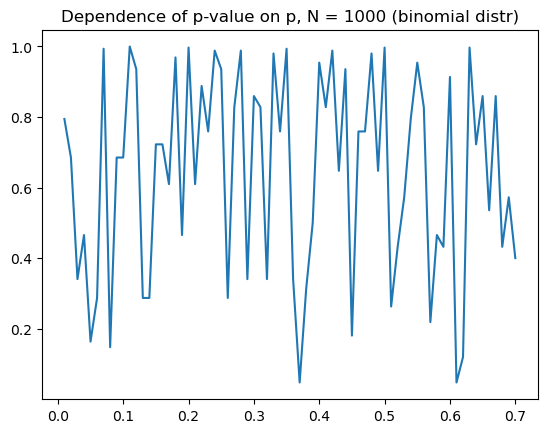

In [32]:
sns.lineplot(data=None,  x=ps, y=p_values_binomial).set(title='Dependence of p-value on p, N = 1000 (binomial distr)')

c:\Users\Filip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Filip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Dependence of p-value on p, N = 1000 (poisson distr)')]

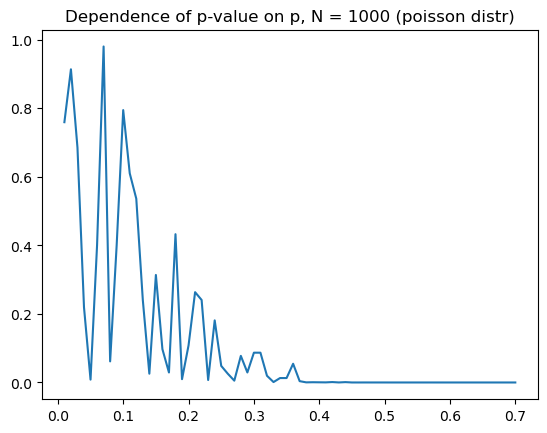

In [33]:
sns.lineplot(data=None,  x=ps, y=p_values_poisson).set(title='Dependence of p-value on p, N = 1000 (poisson distr)')

We can see that for high p ( higher than 0.3), poisson distribution is not valid for degree distribution. p-value becomes extremely low, which means we should reject null hypothesis ( there are significant differences between ditributions )

**Conclusion:** poisson approximation does not seem valid for values of probability p > 0.3 for $G_{n,p}$ model. The approximation is more robust to changes of N ( being sample size or vertices number)

# P 5.1 

Open LaTeX

# 5.2

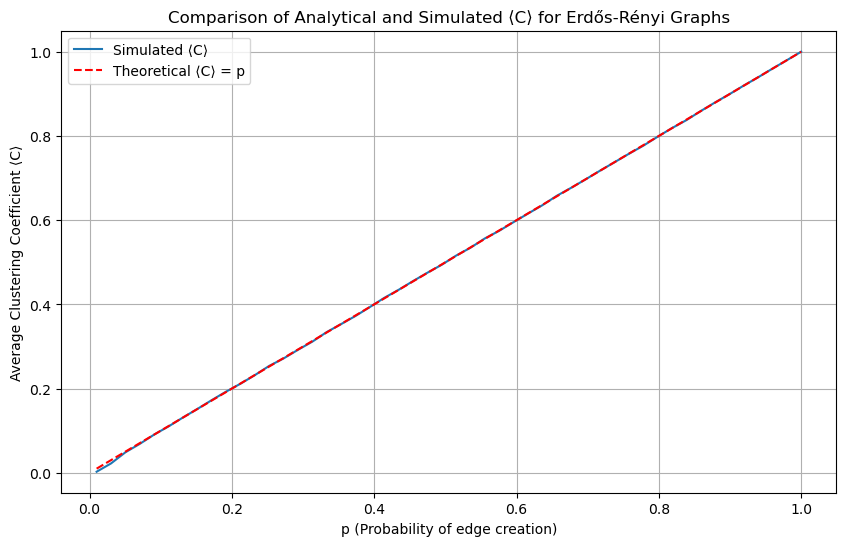

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

num_nodes = 100  # Number of nodes in the graph
p_values = np.linspace(0.01, 1, 50)  # Different probabilities for edge creation
num_simulations = 100  # Number of simulations for each p

average_clustering = []

# Run simulations
for p in p_values:
    clustering_coeffs = []
    for _ in range(num_simulations):
        G = nx.erdos_renyi_graph(num_nodes, p)
        clustering_coeff = nx.average_clustering(G)
        clustering_coeffs.append(clustering_coeff)
    average_clustering.append(np.mean(clustering_coeffs))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(p_values, average_clustering, label='Simulated ⟨C⟩')
plt.plot(p_values, p_values, '--', label='Theoretical ⟨C⟩ = p', color='red')
plt.xlabel('p (Probability of edge creation)')
plt.ylabel('Average Clustering Coefficient ⟨C⟩')
plt.title('Comparison of Analytical and Simulated ⟨C⟩ for Erdős-Rényi Graphs')
plt.legend()
plt.grid(True)
plt.show()


# 5.3

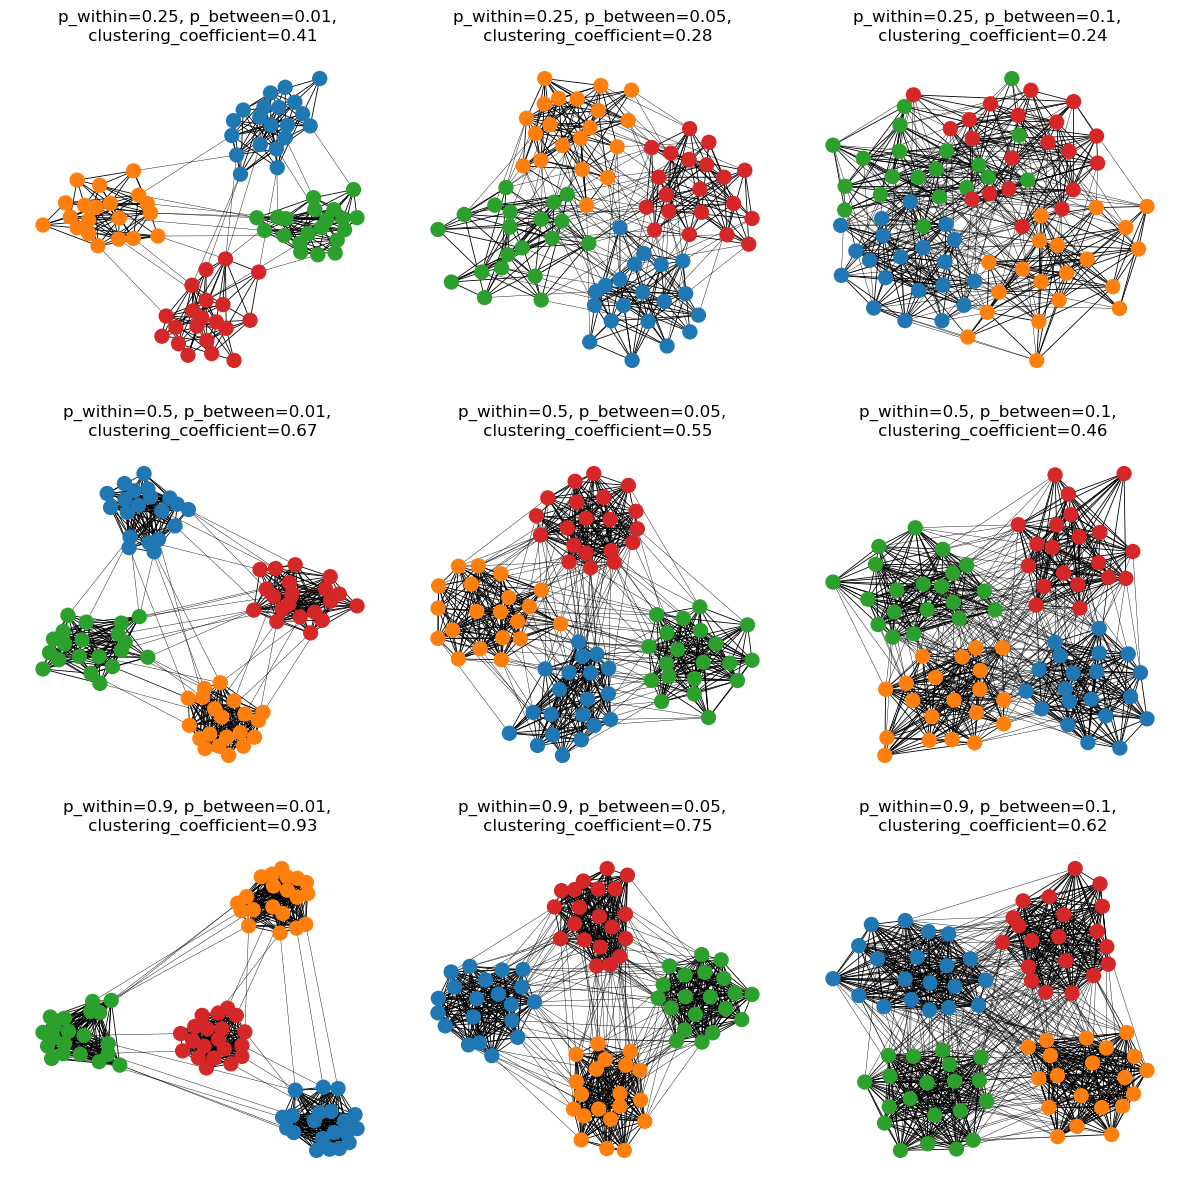

In [ ]:
import networkx as nx 
import matplotlib.pyplot as plt
import random
import numpy as np

def draw_community_graph(N=20, num_communities=4, p_within=0.3, p_between=0.05):
    G = nx.Graph()

    # intra-community edges
    node_community_mapping = {}
    for i in range(num_communities):
        nodes = range(i * N, (i + 1) * N)
        G.add_nodes_from(nodes)
        node_community_mapping.update({node: i for node in nodes})
        for u in nodes:
            for v in nodes:
                if u != v and random.random() < p_within:
                    G.add_edge(u, v)
                    G[u][v]['width'] = 0.6

    # inter-community edges
    for i in range(num_communities):
        for j in range(i + 1, num_communities):
            for u in range(i * N, (i + 1) * N):
                for v in range(j * N, (j + 1) * N):
                    if random.random() < p_between:
                        G.add_edge(u, v)
                        G[u][v]['width'] = 0.3

    # Create a color palette with more contrasting colors
    community_colors = [
        plt.cm.tab10(i) for i in range(min(10, num_communities))
    ] + [
        plt.cm.Set3(i) for i in range(min(12, num_communities - 10))
    ] + [
        plt.cm.Accent(i) for i in range(num_communities - 22)
    ]

    node_colors = [community_colors[node_community_mapping[node] % len(community_colors)] for node in G.nodes()]

    # Draw the graph with community colors
    pos = nx.spring_layout(G)
    width = [G[u][v]['width'] for u, v in G.edges()]
    clustering_coefficient = nx.average_clustering(G)

    return G, pos, node_colors, width, clustering_coefficient

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
parameters = [(0.25, 0.01), (0.25, 0.05), (0.25, 0.1), (0.5, 0.01), (0.5, 0.05), (0.5, 0.1), (0.9, 0.01), (0.9, 0.05), (0.9, 0.1)]

for i, ax in enumerate(axes.ravel()):
    p_within, p_between = parameters[i]
    G, pos, node_colors, width, clustering_coefficient = draw_community_graph(p_within=p_within, p_between=p_between)
    nx.draw(G, pos, with_labels=False, node_size=100, node_color=node_colors, width=width, ax=ax)
    ax.set_title(f'p_within={p_within}, p_between={p_between}, \n clustering_coefficient={clustering_coefficient:.2f}')

plt.tight_layout()
plt.show()


# 5.4

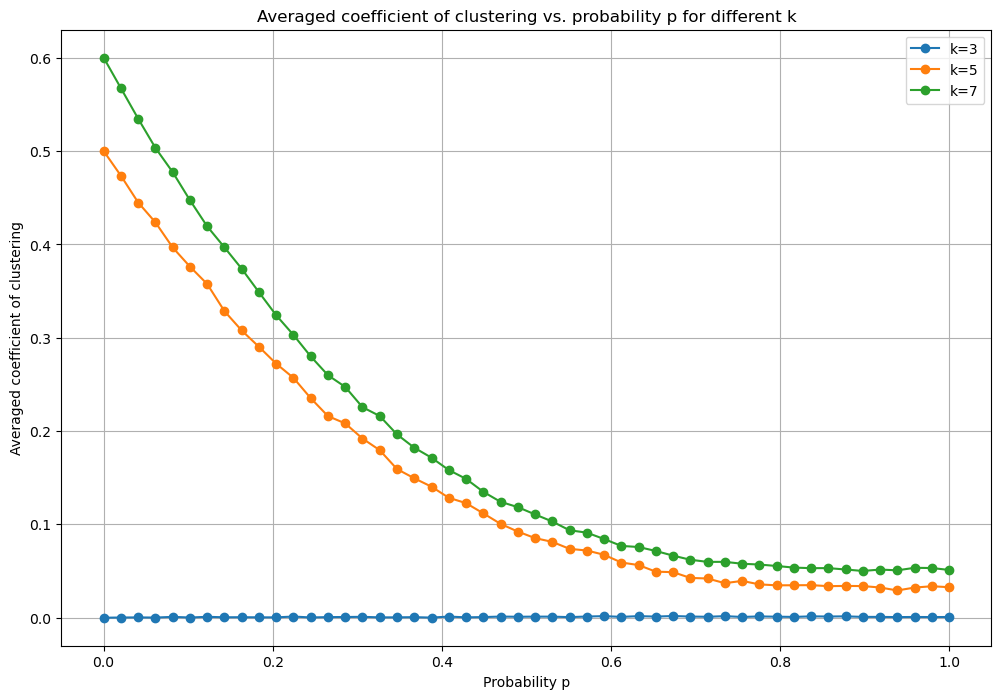

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Parameters
N = 100  # Number of nodes in the network

# Function to calculate the average clustering coefficient for a given probability p
def avClustCoefWS(p: float, M=100, k=5) -> float:
    summ = 0
    for _ in range(M):
        G = nx.generators.random_graphs.connected_watts_strogatz_graph(N, k, p)
        summ += nx.average_clustering(G)
    return summ / M

# Range of probability values
X = np.linspace(0, 1, 50)

# Values of k to plot
k_values = [3, 5, 7]

# Plot the graph for different values of k
plt.figure(figsize=(12, 8))
for k in k_values:
    Y = [avClustCoefWS(p, k=k) for p in X]
    plt.plot(X, Y, marker='o', label=f'k={k}')

# Adding plot details
plt.title("Averaged coefficient of clustering vs. probability p for different k")
plt.xlabel("Probability p")
plt.ylabel("Averaged coefficient of clustering")
plt.legend()
plt.grid(True)
plt.show()


# 5.5

Converged: True


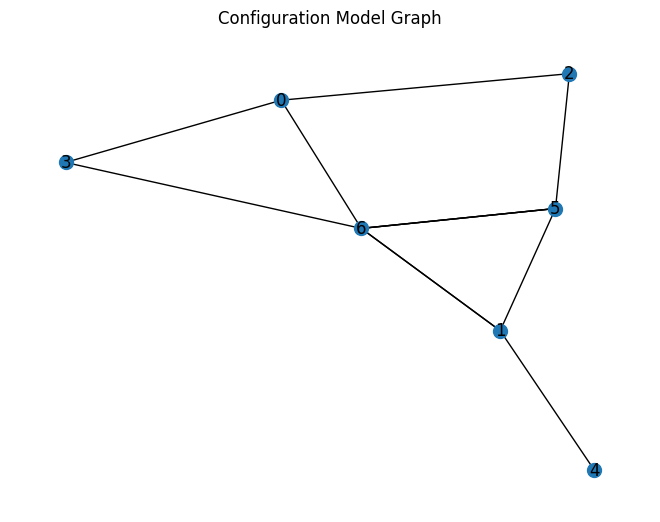

In [1]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt

def configuration_model(degree_sequence, max_iter=1000):
    num_iter = 0

    # Initialize the graph
    G = nx.MultiGraph()
    degrees = np.array(degree_sequence)
    
    for i in range(len(degree_sequence)):
        G.add_node(i)

    # Keep track of stub pairs for edge formation
    while any(degrees > 0) and num_iter < max_iter:
        # Select two distinct nodes with available degree stubs
        i = np.random.choice(np.where(degrees > 0)[0])
        degrees[i] -= 1
        
        j = np.random.choice(np.where(degrees > 0)[0])
        # Avoid self-loops
        while j == i and len(np.where(degrees > 0)[0]) > 1:
            j = np.random.choice(np.where(degrees > 0)[0])
        
        degrees[j] -= 1
        G.add_edge(i, j)
        num_iter += 1

    return G

# Example degree sequence
degree_sequence = [3, 4, 2, 2, 1, 5, 7]
G = configuration_model(degree_sequence)

# Check if the degree sequence is preserved
converged = np.all([G.degree(node) == degree for node, degree in enumerate(degree_sequence)])

print("Converged:", converged)

# Visualize the generated graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=100)
plt.title("Configuration Model Graph")
plt.show()


Converged: True


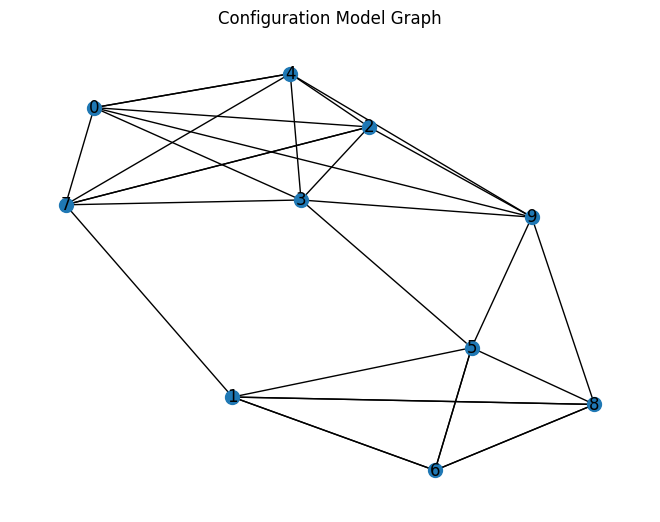

In [2]:
# Example degree sequence
degree_sequence = [6,6,6,6,6,6,6,6,6,6]
G = configuration_model(degree_sequence)

# Check if the degree sequence is preserved
converged = np.all([G.degree(node) == degree for node, degree in enumerate(degree_sequence)])

print("Converged:", converged)

# Visualize the generated graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=100)
plt.title("Configuration Model Graph")
plt.show()


# 5.7

https://arxiv.org/pdf/cond-mat/0405566


# Hamiltonian Inspired by Exponential Random Graph Model

Based on the paper by Juyong Park and M. E. J. Newman, a suitable Hamiltonian inspired by the exponential random graph model can be defined as:

$$
H(G) = \theta m(G) - \alpha s(G)
$$

where:

- \( m(G) \) is the number of edges in the graph.
- \( s(G) \) is the number of "2-stars" (pairs of edges sharing a common vertex), calculated as:
  $$
  s = \frac{1}{2} \sum_{i} k_i (k_i - 1)
  $$
  where \( k_i \) is the degree of node \( i \).

- \( \theta \) and \( \alpha \) are parameters that can be adjusted to model specific properties, with \( \theta \) acting as a field coupling to the number of edges and \( \alpha \) emphasizing the density of 2-stars.

This Hamiltonian balances edge count and clustering within the network. The exponential random graph distribution for this Hamiltonian would be:

$$
P(G) = \frac{e^{-H(G)}}{Z}
$$

where \( Z \) is the partition function:

$$
Z = \sum_{G} e^{-H(G)}
$$

This model captures properties beyond just the number of edges, incorporating aspects of connectivity and clustering through the 2-star term.


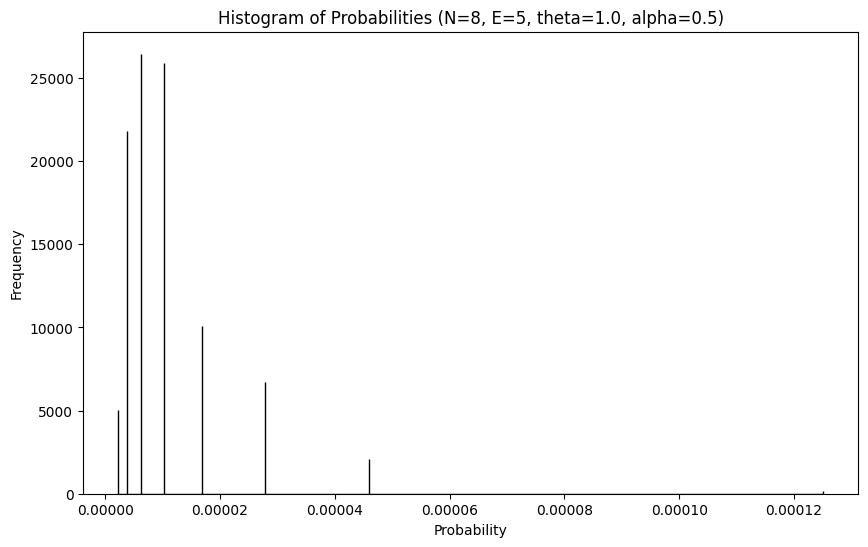

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

# Define the Hamiltonian function
def hamiltonian(graph, theta, alpha):
    num_edges = np.sum(graph) // 2  # Total number of edges
    degrees = np.sum(graph, axis=0)
    num_2stars = sum(k * (k - 1) // 2 for k in degrees)  # Number of 2-stars
    return theta * num_edges - alpha * num_2stars

# Generate all possible graphs with N vertices and E edges
def generate_graphs(N, E):
    all_graphs = []
    nodes = list(range(N))
    possible_edges = list(itertools.combinations(nodes, 2))
    
    for edges in itertools.combinations(possible_edges, E):
        graph = np.zeros((N, N), dtype=int)
        for i, j in edges:
            graph[i, j] = 1
            graph[j, i] = 1
        all_graphs.append(graph)
    
    return all_graphs

# Compute the partition function and probability distribution
def compute_partition_function_and_distribution(N, E, theta, alpha):
    graphs = generate_graphs(N, E)
    Z = 0
    probabilities = []
    
    for graph in graphs:
        H = hamiltonian(graph, theta, alpha)
        weight = np.exp(-H)
        Z += weight
        probabilities.append(weight)
    
    probabilities = [p / Z for p in probabilities]
    return Z, probabilities

# Visualize the histogram of probabilities
def visualize_histogram(N, E, theta, alpha):
    Z, probabilities = compute_partition_function_and_distribution(N, E, theta, alpha)
    
    plt.figure(figsize=(10, 6))
    plt.hist(probabilities, bins=len(probabilities), edgecolor='black')
    plt.xlabel('Probability')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Probabilities (N={N}, E={E}, theta={theta}, alpha={alpha})')
    plt.show()

# Example usage:
N = 8  # Number of vertices
E = 5  # Number of edges
theta = 1.0  # Parameter for edge count term
alpha = 0.5  # Parameter for 2-star term

visualize_histogram(N, E, theta, alpha)
